In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


## Define states

<002432> Loading distances between samples already computed ...
<002432> Consensus clustering with 30 clusterings ...
<002432> k=12 ...
<002432> 	Permuting distance matrix with repeat and clustering (0/30) ...
<002432> 	Permuting distance matrix with repeat and clustering (10/30) ...
<002432> 	Permuting distance matrix with repeat and clustering (20/30) ...
<002432> 	Making consensus matrix from 30 hierarchical clusterings of randomized distance matrix ...


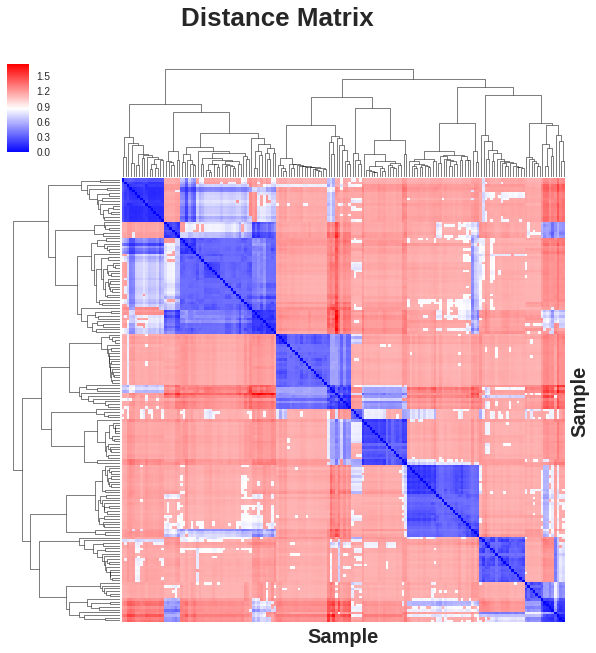

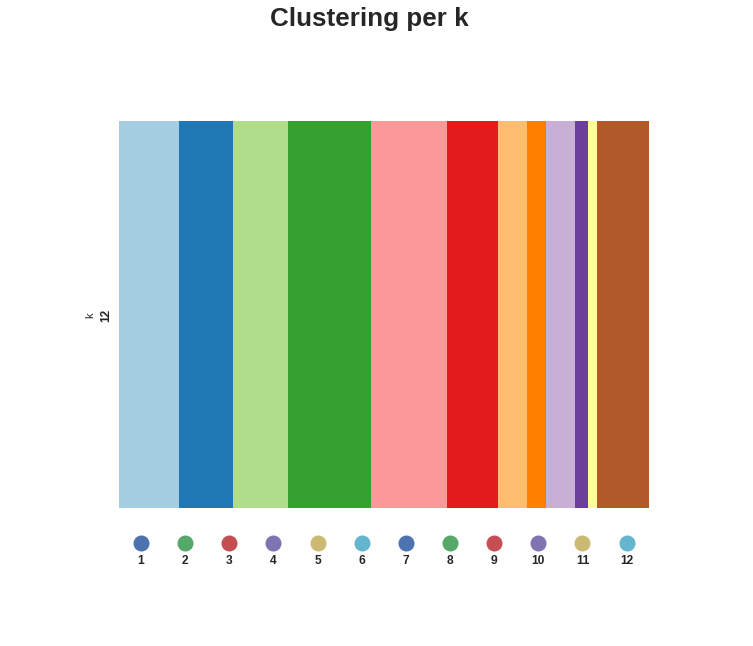

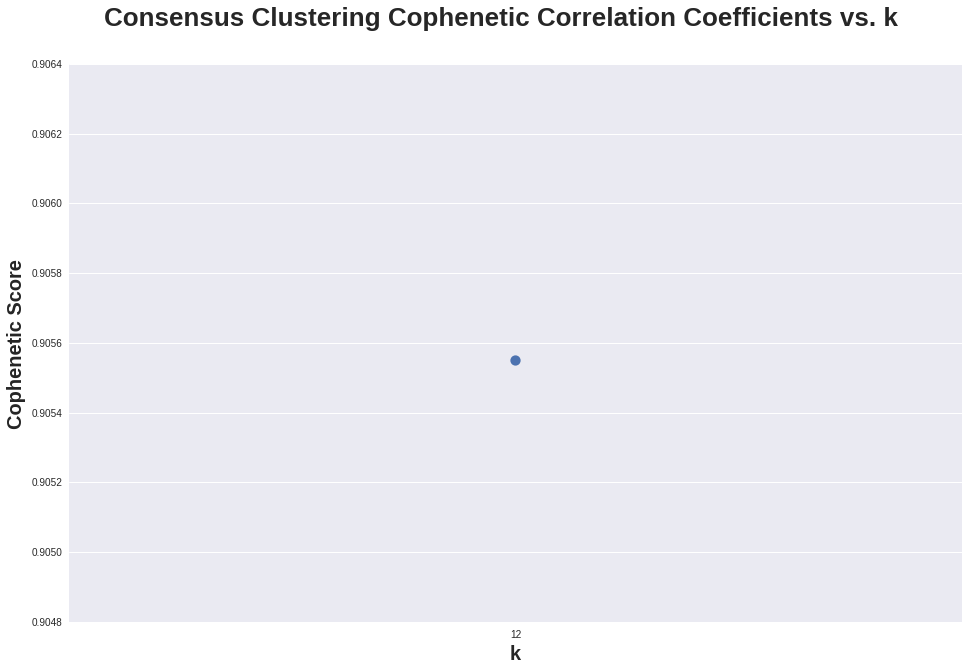

In [2]:
h = ccal.support.read_gct('data/hema_k9_H.gct')
ks = [12]
# distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
#                                                                            ks,
#                                                                            n_clusterings=30,
#                                                                            max_std=5,
#                                                                            directory_path='result/define_states/')
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                           ks,
                                                                           distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                           n_clusterings=30,
                                                                           max_std=5)
state_labels = clusterings.ix[12, :]

## Make Onco-GPS with real data

<002434> Training Onco-GPS with 9 components, 166 samples, and 12 states ...
<002434> 	Components: {'nmf_compC4_9', 'nmf_compC7_9', 'nmf_compC1_9', 'nmf_compC9_9', 'nmf_compC6_9', 'nmf_compC2_9', 'nmf_compC5_9', 'nmf_compC8_9', 'nmf_compC3_9'}.
<002434> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}.
<002434> Computing component coordinates using informational distance ...
<002434> Computing associations (axis=1) between matrices (0/9) ...
<002434> Computing associations (axis=1) between matrices (1/9) ...
<002434> Computing associations (axis=1) between matrices (2/9) ...
<002434> Computing associations (axis=1) between matrices (3/9) ...
<002434> Computing associations (axis=1) between matrices (4/9) ...
<002434> Computing associations (axis=1) between matrices (5/9) ...
<002434> Computing associations (axis=1) between matrices (6/9) ...
<002434> Computing associations (axis=1) between matrices (7/9) ...
<002434> Computing associations (axis=1) between matrices (8/9) ...
<

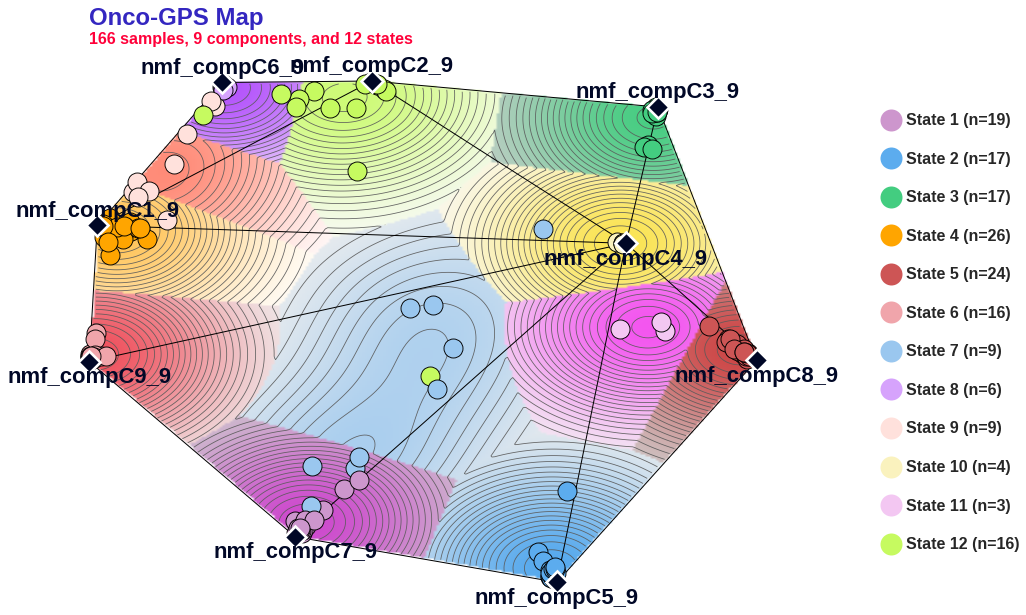

In [3]:
output = ccal.make_oncogps_map(h, state_labels, component_ratio=2,
                               filepath='result/make_oncogps_map.pdf', colors='paper', component_markeredgewidth=2.6)

## Project samples

<002459> 	Testing normalization: using_training
<002459> Training Onco-GPS with 9 components, 166 samples, and 12 states ...
<002459> 	Components: {'nmf_compC4_9', 'nmf_compC7_9', 'nmf_compC1_9', 'nmf_compC9_9', 'nmf_compC6_9', 'nmf_compC2_9', 'nmf_compC5_9', 'nmf_compC8_9', 'nmf_compC3_9'}.
<002459> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}.
<002459> Computing component coordinates using informational distance ...
<002459> Computing associations (axis=1) between matrices (0/9) ...
<002459> Computing associations (axis=1) between matrices (1/9) ...
<002459> Computing associations (axis=1) between matrices (2/9) ...
<002459> Computing associations (axis=1) between matrices (3/9) ...
<002459> Computing associations (axis=1) between matrices (4/9) ...
<002459> Computing associations (axis=1) between matrices (5/9) ...
<002459> Computing associations (axis=1) between matrices (6/9) ...
<002459> Computing associations (axis=1) between matrices (7/9) ...
<002459> Computing as

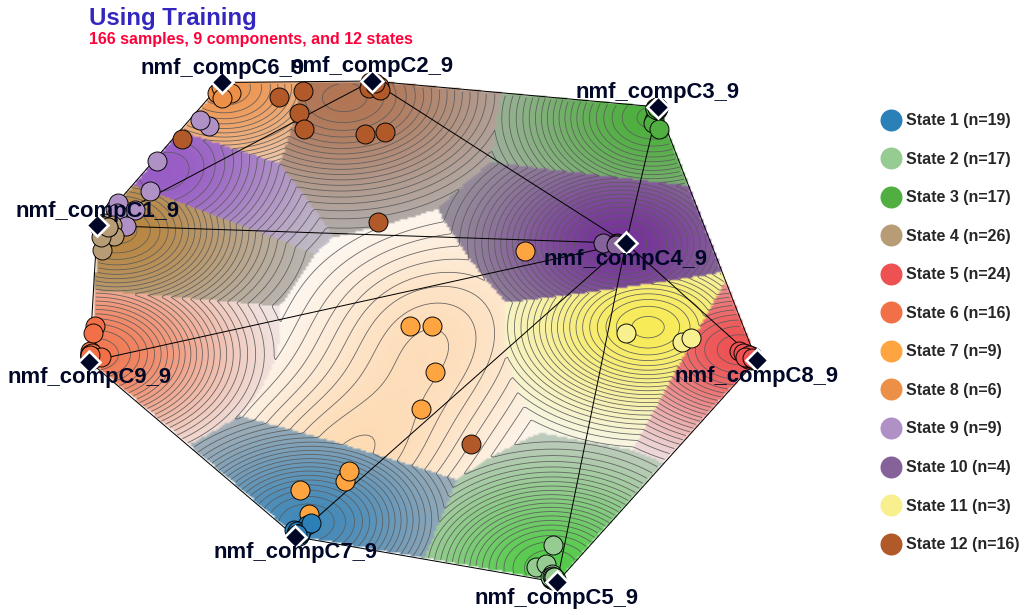

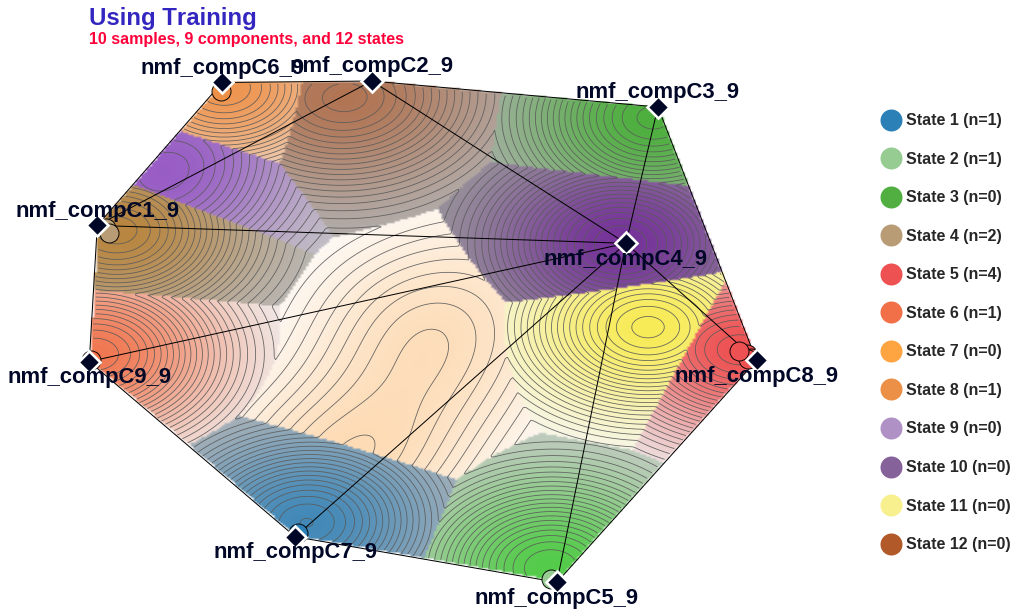

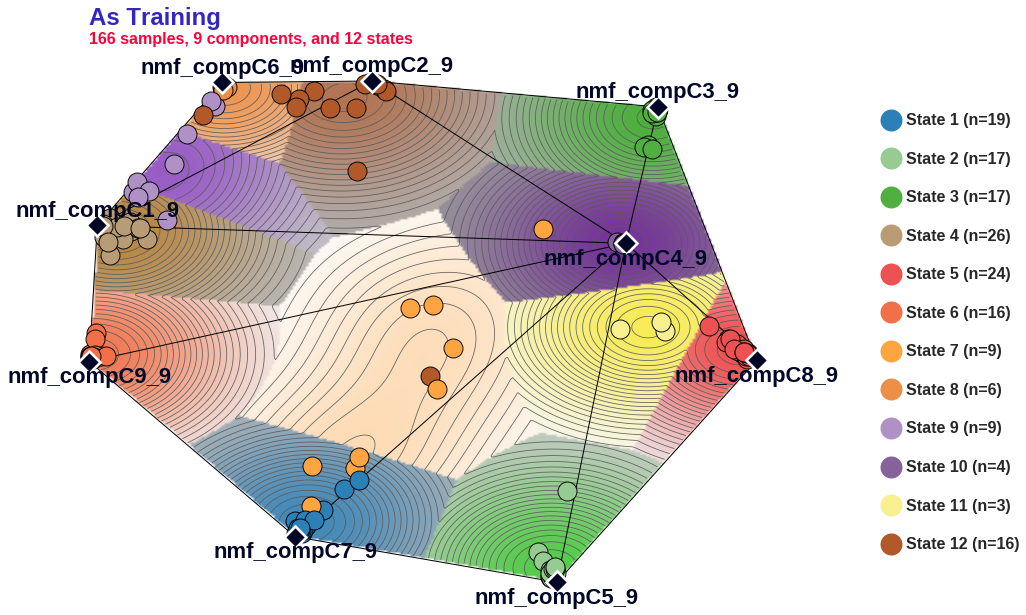

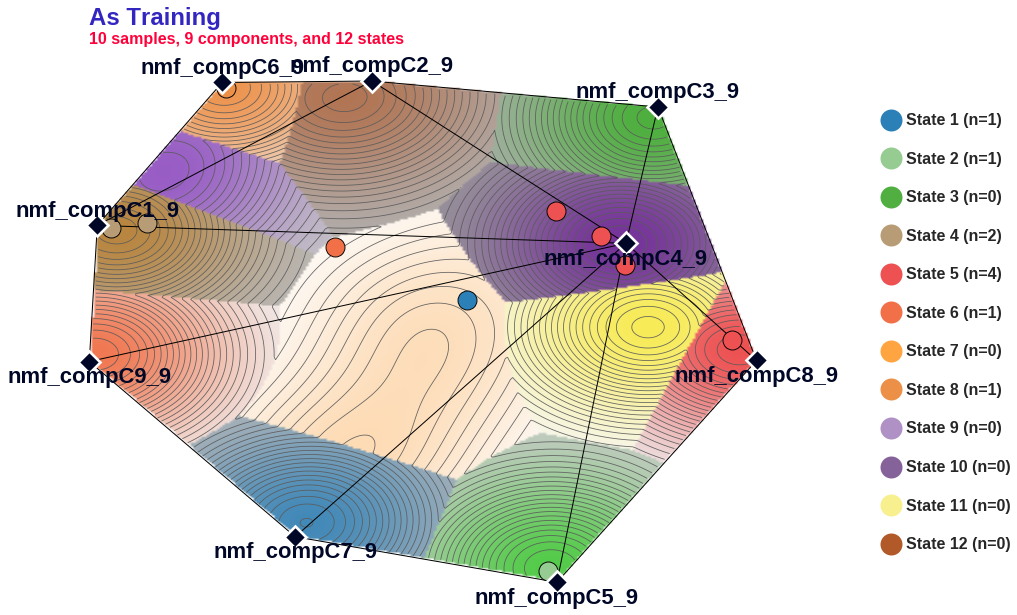

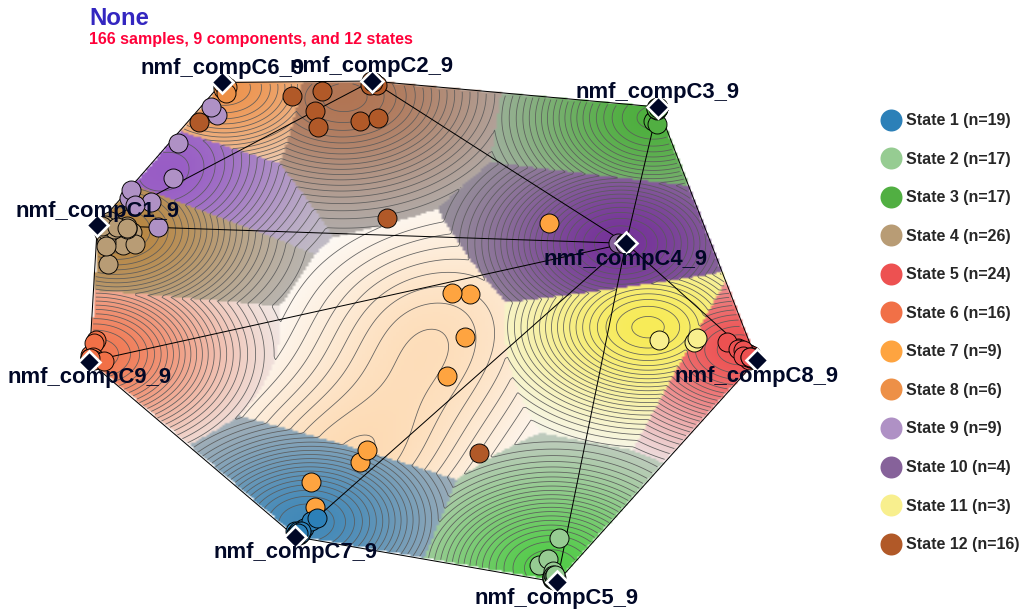

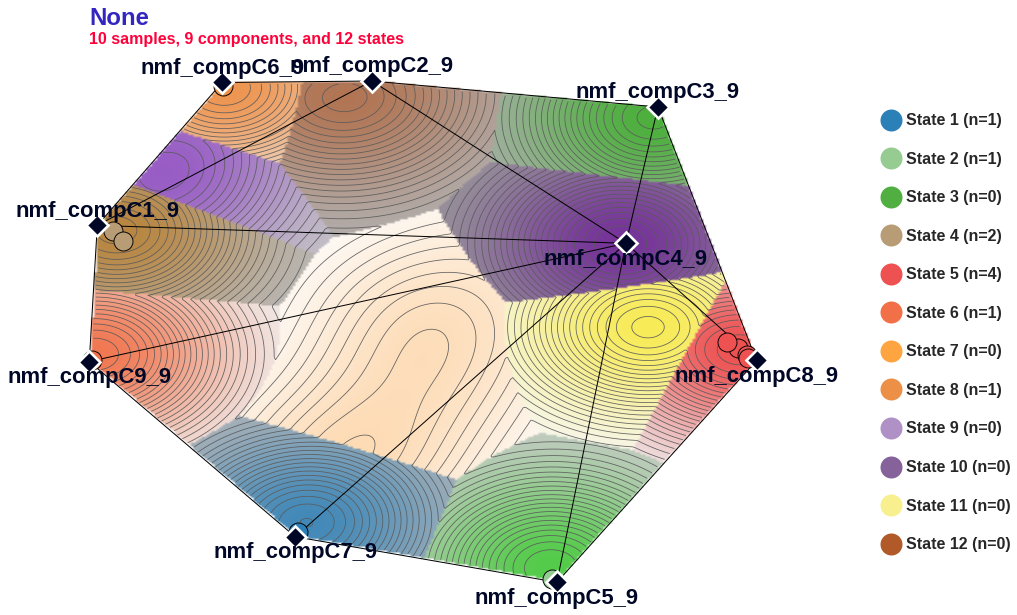

In [4]:
# output = ccal.make_oncogps_map(h, state_labels)
n = 10

output1 = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                                testing_h_normalization='using_training',
                                title='Using Training')
output2 = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                                testing_h_normalization='using_training',
                                title='Using Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization='as_training',
                               title='As Training')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization='as_training',
                               title='As Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization=None,
                               title='None')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization=None,
                               title='None')

try:
    output = ccal.make_oncogps_map(h, state_labels,
                                   testing_h=h, testing_states=state_labels,
                                   testing_h_normalization='foo')
except ValueError as e:
    print(e)

## Make Onco-GPS with random data

n_components: 3
n_state: 12
<002529> Training Onco-GPS with 3 components, 166 samples, and 12 states ...
<002529> 	Components: {'nmf_compC1_9', 'nmf_compC2_9', 'nmf_compC3_9'}.
<002529> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}.
<002529> Computing component coordinates using informational distance ...
<002529> Computing associations (axis=1) between matrices (0/3) ...
<002529> Computing associations (axis=1) between matrices (1/3) ...
<002529> Computing associations (axis=1) between matrices (2/3) ...
<002529> Converting association to distance (1 - association) ...
<002529> Computing component power ...
<002529> 	Could't model with Ae^(kx) + C; too few data points.
<002529> Computing sample coordinates using 3 components and 1.000 power ...
<002529> Computing grid probabilities and states ...
<002530> Plotting ...
<002531> Training Onco-GPS with 3 components, 166 samples, and 12 states ...
<002531> 	Components: {'nmf_compC1_9', 'nmf_compC2_9', 'nmf_compC3_9'}.
<002531>

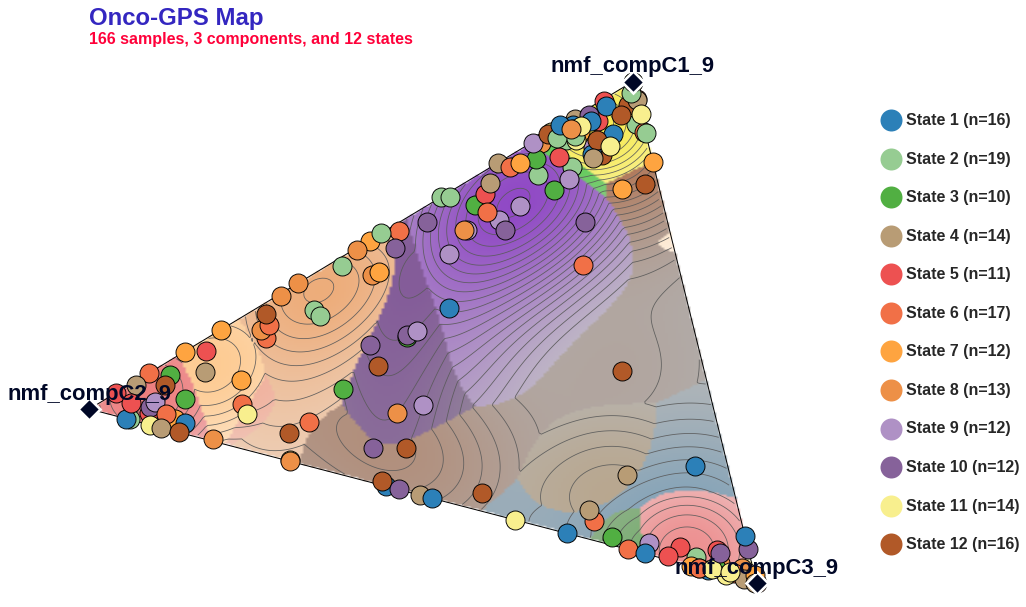

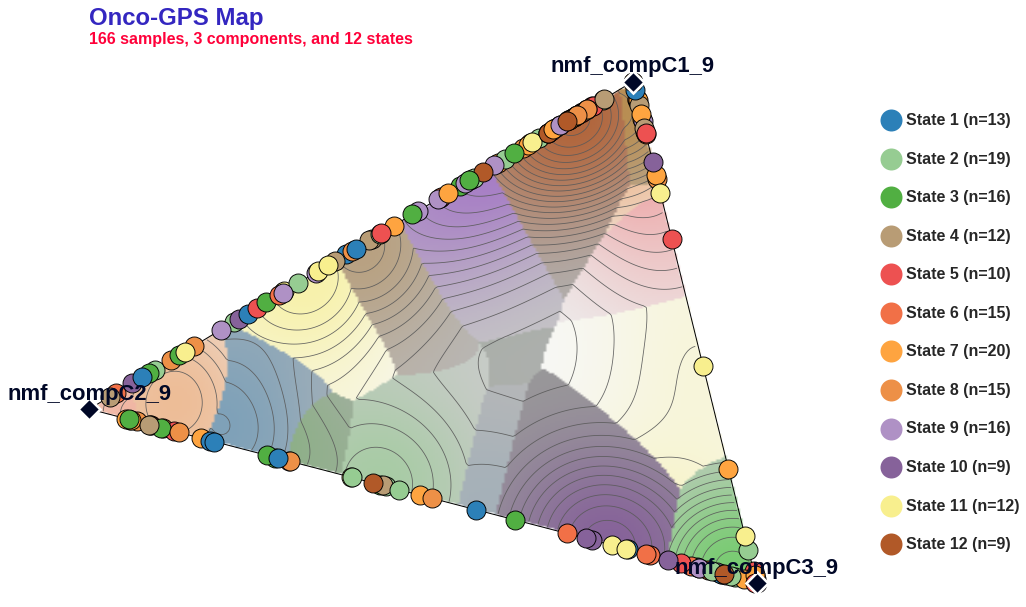

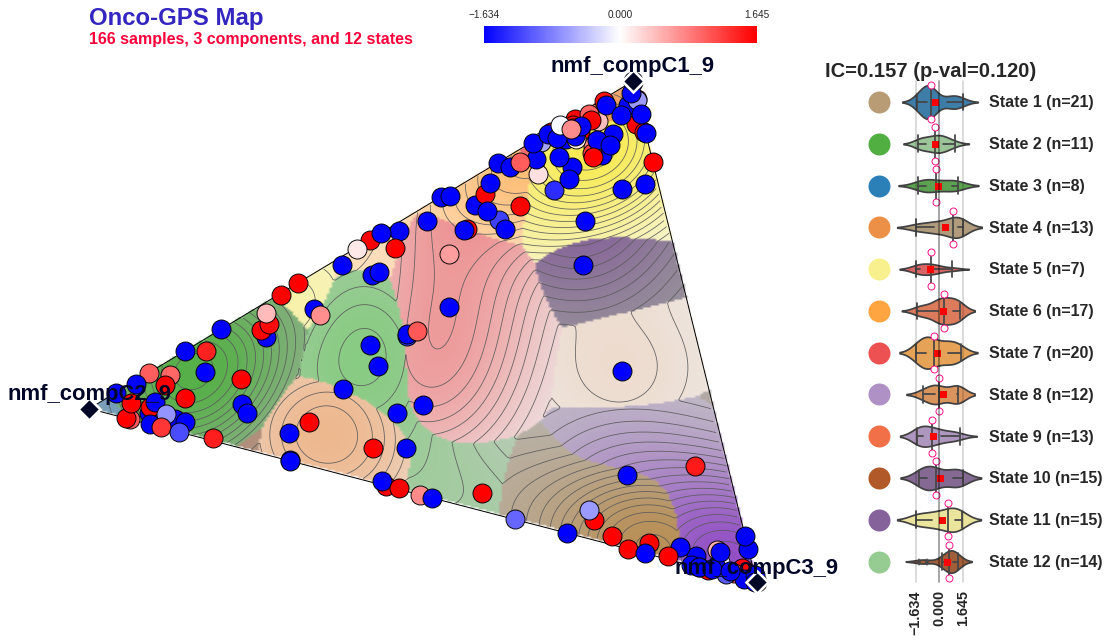

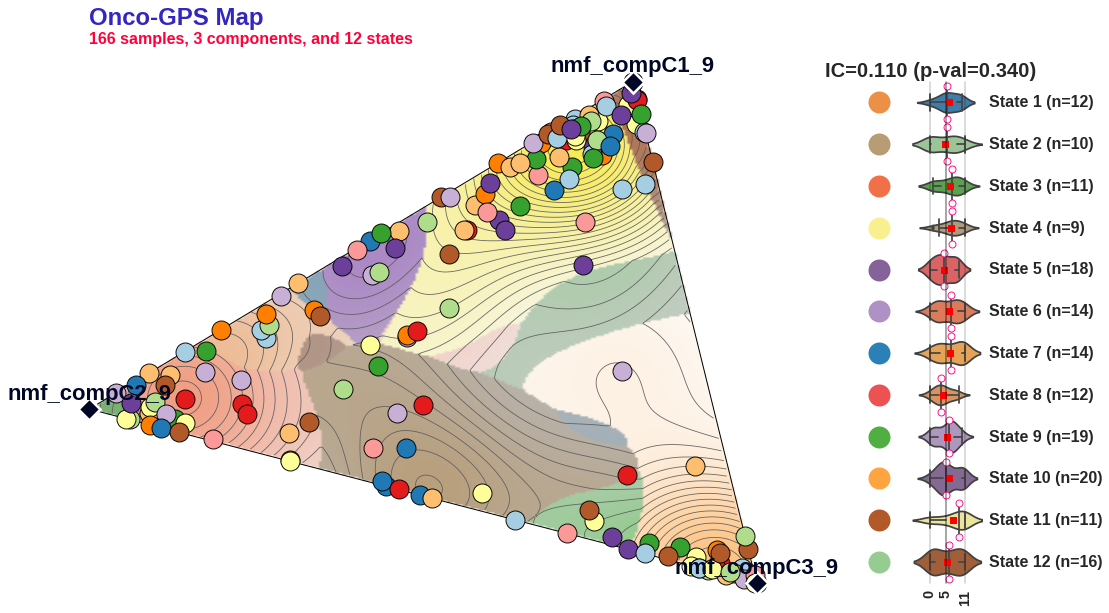

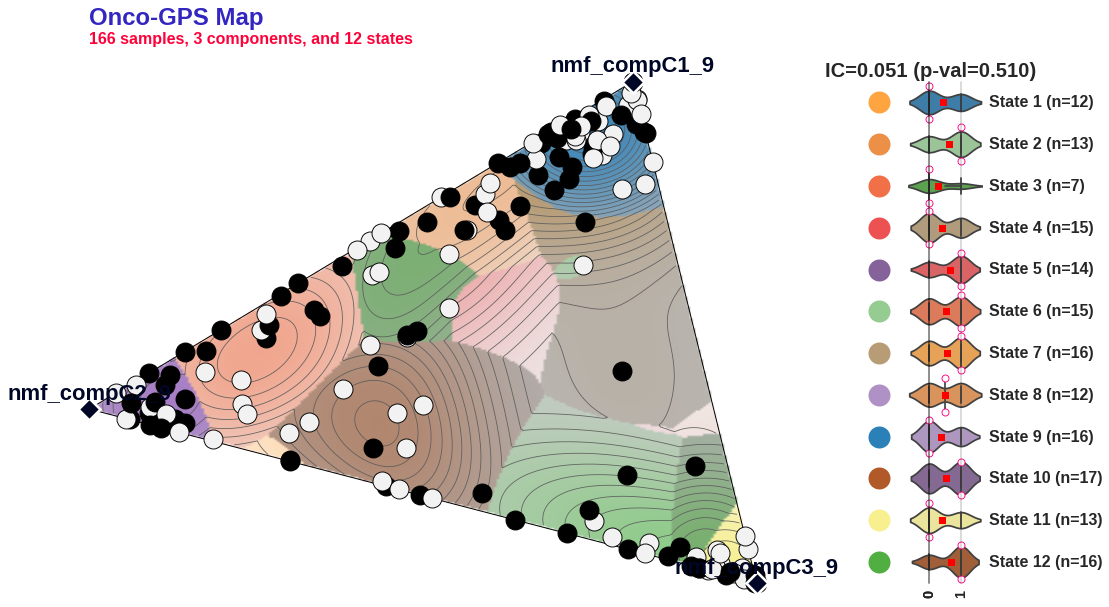

In [5]:
for n_components in [3]:
    print('n_components:', n_components)
    for n_state in ks[::5]:
        print('n_state:', n_state)
        ccal.make_oncogps_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]))
        ccal.make_oncogps_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]), n_pulls=2)
        for annotation_type in ['continuous', 'categorical', 'binary']:
            print('annotation_type:', annotation_type)
            if annotation_type == 'continuous':
                annotation = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotation = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotation = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.make_oncogps_map(h.iloc[:n_components, :],
                                  np.random.choice(list(range(1, n_state + 1)), h.shape[1]),
                                  annotation=annotation,
                                  annotation_type=annotation_type)